# Clustering Evaluation Project

## Overview

This project aims to evaluate different clustering algorithms and data processing methods using various evaluation metrics such as silhouette score, Calinski-Harabasz score, and Davies-Bouldin score. 
<br> 



# Importing necessary library

In [26]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the breast cancer dataset (As its also present in UCI datasets)

In [27]:
breast_cancer = load_breast_cancer()
data = breast_cancer.data

In [28]:
# Define different subcluster sizes
subcluster_sizes = [2, 3, 4]

## We would do the analysis for three clustering algos Kmeans, Agglomerative, DBSCAN

In [29]:
# Define clustering algorithms
clustering_algorithms = {
    'KMeans': KMeans,
    'AgglomerativeClustering': AgglomerativeClustering,
    'DBSCAN': DBSCAN
}

In [30]:
# Initialize dictionaries to store results for each algorithm
results_dict = {algorithm_name: [] for algorithm_name in clustering_algorithms.keys()}

In [31]:
import warnings
# Ignore specific warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")
warnings.filterwarnings("ignore", message="The default value of `n_init` will change from 10 to 'auto' in 1.4.")

In [32]:
# Loop through different clustering algorithms
for algorithm_name, algorithm in clustering_algorithms.items():
    # Loop through different data processing methods
    for processing_method in ['No Data Processing', 'Normalization', 'Transformation', 'PCA', 'T+N', 'T+N+PCA']:
        for subcluster_size in subcluster_sizes:
            # Apply data processing based on the method
            processed_data = data.copy()  # Assume no processing by default
            if processing_method == 'Normalization':
                scaler = MinMaxScaler()
                processed_data = scaler.fit_transform(data)
            elif processing_method == 'Transformation':
                scaler = StandardScaler()
                processed_data = scaler.fit_transform(data)
            elif processing_method == 'PCA':
                pca = PCA(n_components=min(subcluster_size, data.shape[1]))
                processed_data = pca.fit_transform(data)
            elif processing_method == 'T+N':
                scaler = MinMaxScaler()
                transformed_data = scaler.fit_transform(data)
                processed_data = transformed_data
            elif processing_method == 'T+N+PCA':
                scaler = MinMaxScaler()
                transformed_data = scaler.fit_transform(data)
                pca = PCA(n_components=min(subcluster_size, data.shape[1]))
                processed_data = pca.fit_transform(transformed_data)
            
            # Perform clustering
            if algorithm_name == 'DBSCAN':
                clusters = algorithm(eps=0.5, min_samples=5).fit_predict(processed_data)
            else:
                clusters = algorithm(n_clusters=subcluster_size).fit_predict(processed_data)
            
            # Check if clustering generated valid clusters
            unique_labels = len(set(clusters))
            if unique_labels > 1:
                # Calculate evaluation metrics
                silhouette = silhouette_score(processed_data, clusters)
                calinski_harabasz = calinski_harabasz_score(processed_data, clusters)
                davies_bouldin = davies_bouldin_score(processed_data, clusters)
                
                # Append results to the list
                results_dict[algorithm_name].append({
                    'Algorithm': algorithm_name,
                    'Processing Method': processing_method,
                    'Subcluster Size': subcluster_size,
                    'Silhouette Score': silhouette,
                    'Calinski-Harabasz Score': calinski_harabasz,
                    'Davies-Bouldin Score': davies_bouldin
                })


## Now I would print the results

In [33]:
# Create DataFrames for each algorithm
dfs = {}
for algorithm_name, results in results_dict.items():
    dfs[algorithm_name] = pd.DataFrame(results)

# Print the results in a beautiful table format
for algorithm_name, df in dfs.items():
    print(f"Clustering Algorithm: {algorithm_name}\n")
    print(df.to_string(index=False))
    print("\n\n")

Clustering Algorithm: KMeans

Algorithm  Processing Method  Subcluster Size  Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
   KMeans No Data Processing                2          0.697265              1300.208227              0.504404
   KMeans No Data Processing                3          0.666020              1253.179257              0.588297
   KMeans No Data Processing                4          0.533461              1465.672861              0.617693
   KMeans      Normalization                2          0.384549               364.093052              1.136335
   KMeans      Normalization                3          0.332393               253.295210              1.457269
   KMeans      Normalization                4          0.325918               203.269210              1.395756
   KMeans     Transformation                2          0.343382               267.691716              1.320510
   KMeans     Transformation                3          0.314384               197.

# Saving the results in CSV file

In [34]:
# Save results as CSV files
for algorithm_name, df in dfs.items():
    filename = f"{algorithm_name}_results.csv"
    df.T.to_csv(filename)
    print(f"{filename} saved successfully.\n")

KMeans_results.csv saved successfully.

AgglomerativeClustering_results.csv saved successfully.

DBSCAN_results.csv saved successfully.



In [35]:
## Plotting the findings

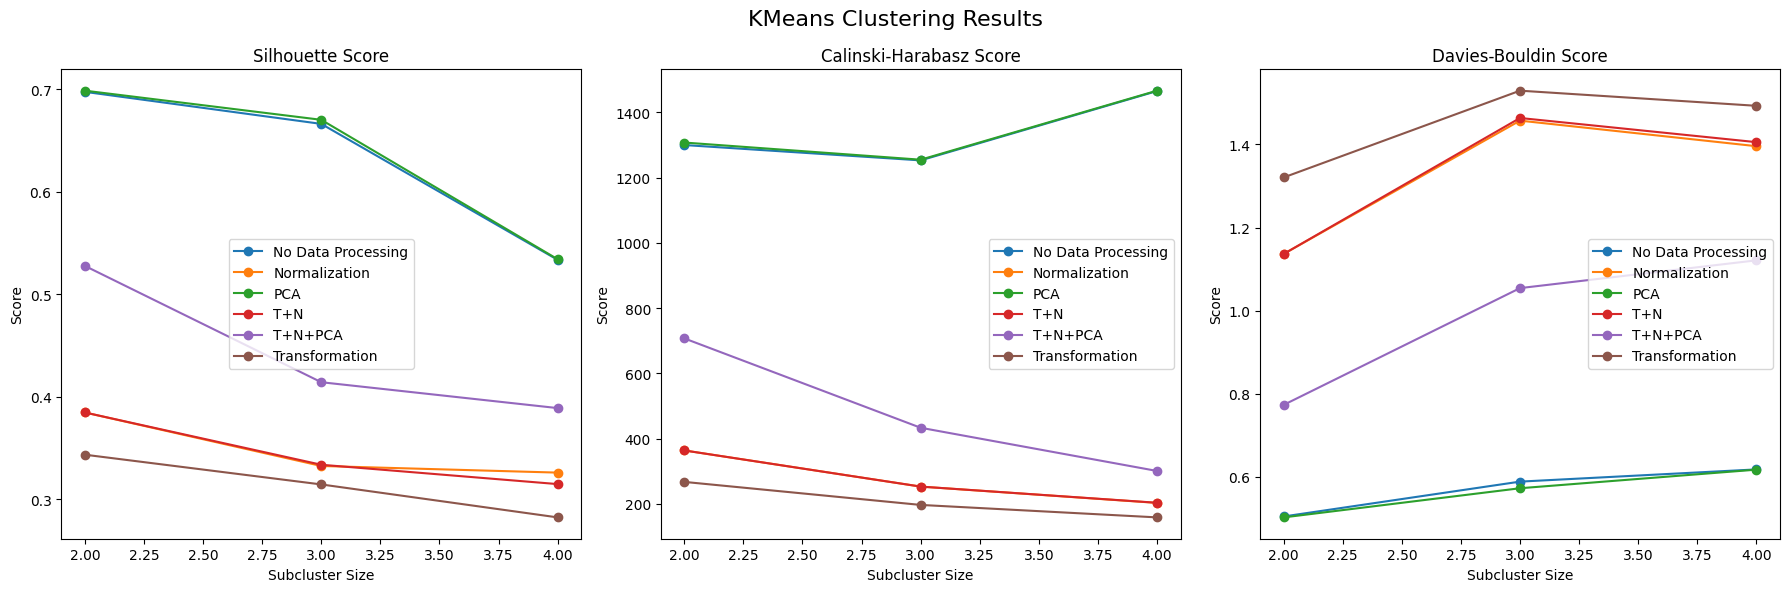

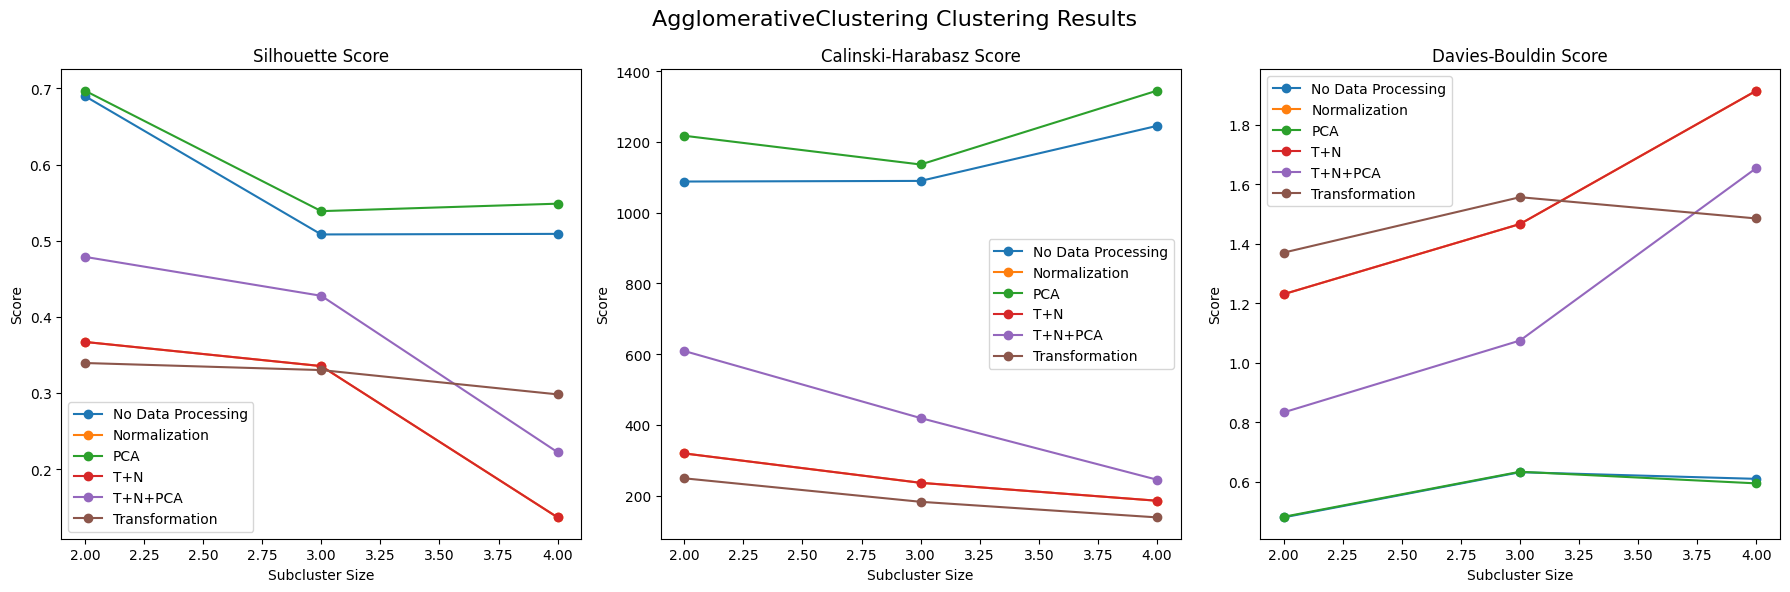

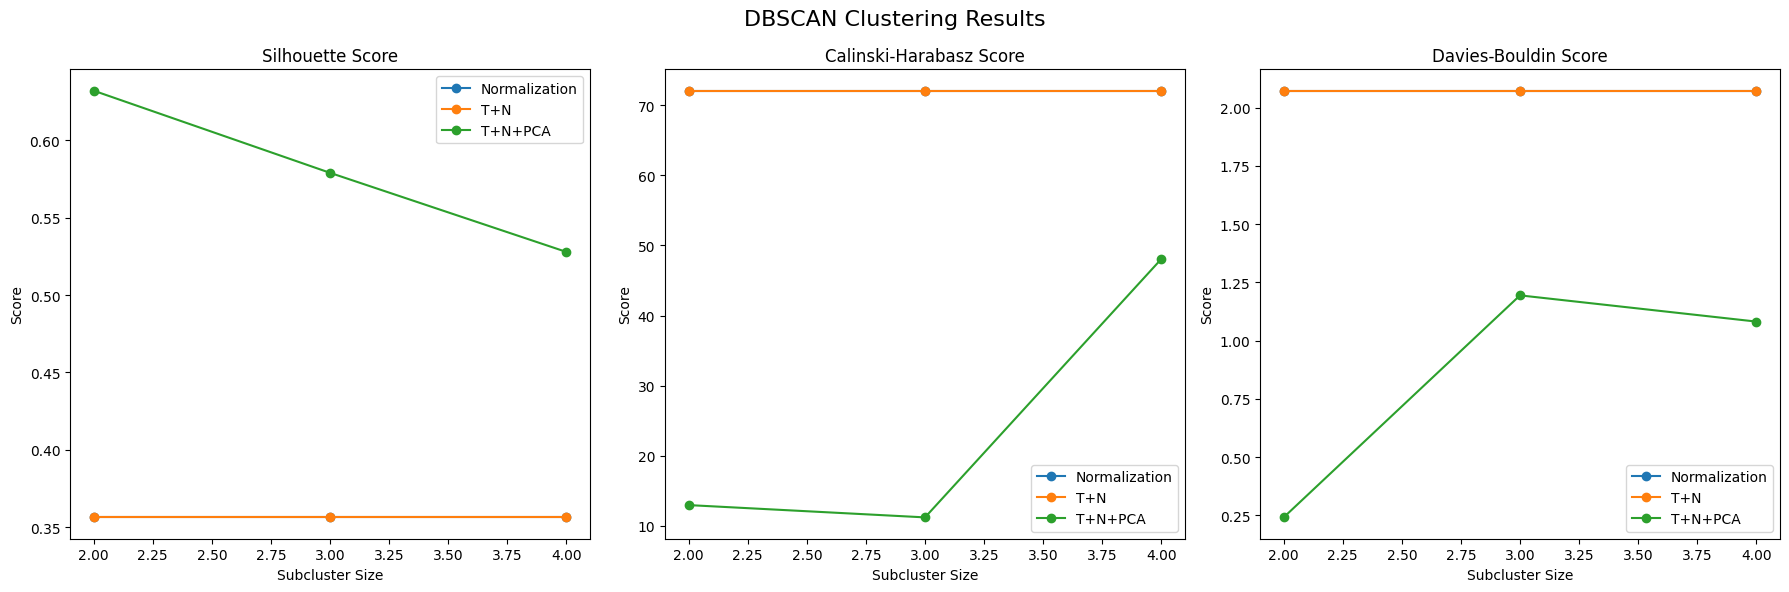

In [36]:
# Define function to plot graphs for each clustering algorithm
def plot_results_per_algorithm(algorithm_name, df):
    # Create subplots for each metric
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Plot each metric
    for i, metric in enumerate(['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']):
        ax = axs[i]
        for method, method_df in df.groupby('Processing Method'):
            ax.plot(method_df['Subcluster Size'], method_df[metric], marker='o', label=method)
        ax.set_title(metric)
        ax.set_xlabel('Subcluster Size')
        ax.set_ylabel('Score')
        ax.legend()

    # Set title for the entire plot
    plt.suptitle(f'{algorithm_name} Clustering Results', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot results for each algorithm
for algorithm_name, df in dfs.items():
    plot_results_per_algorithm(algorithm_name, df)


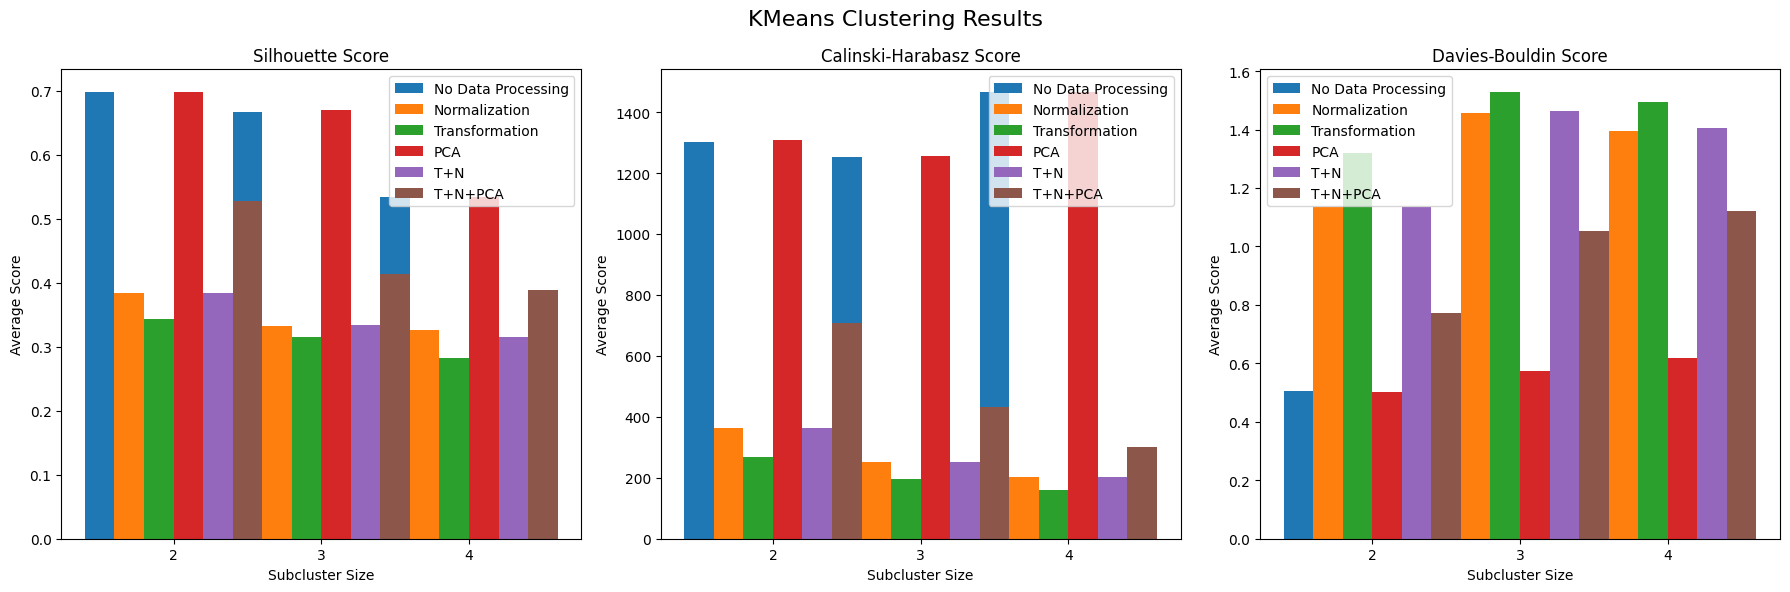

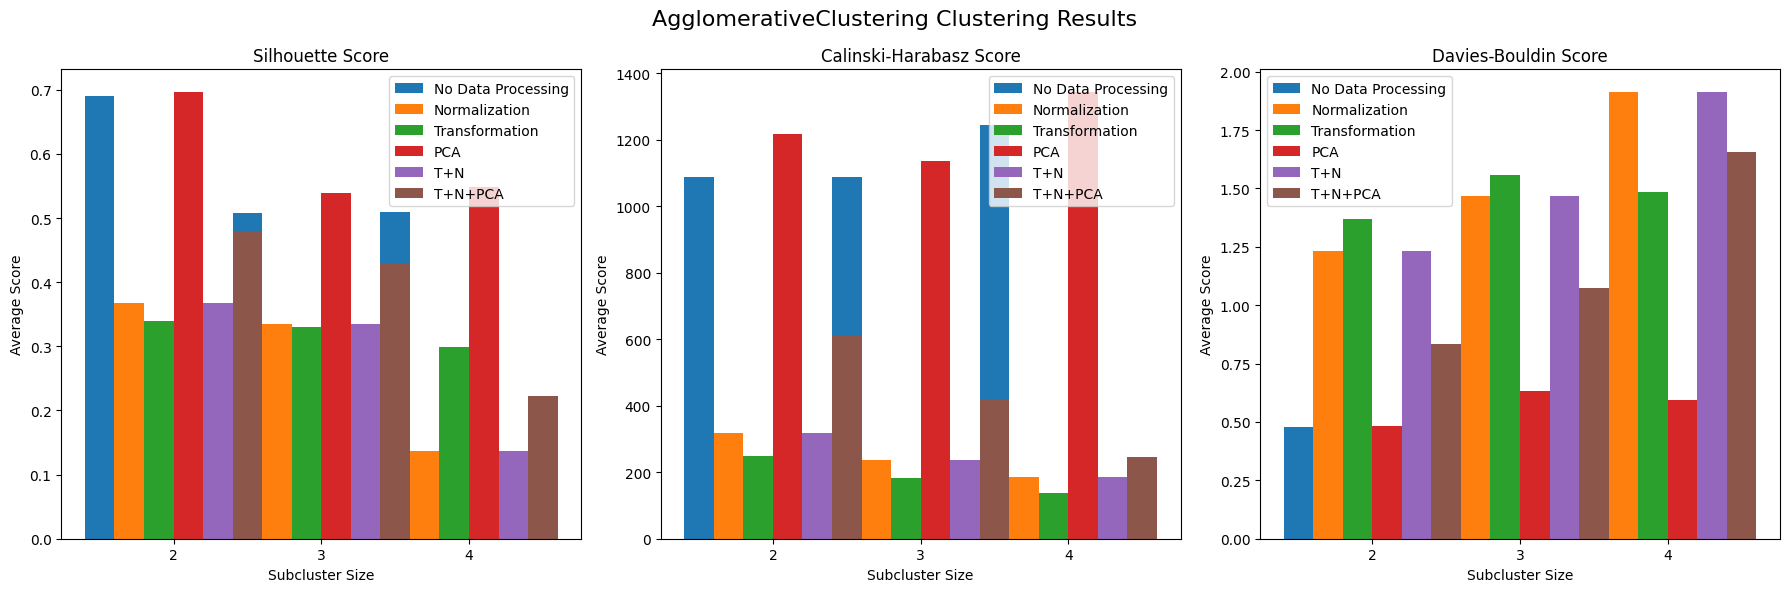

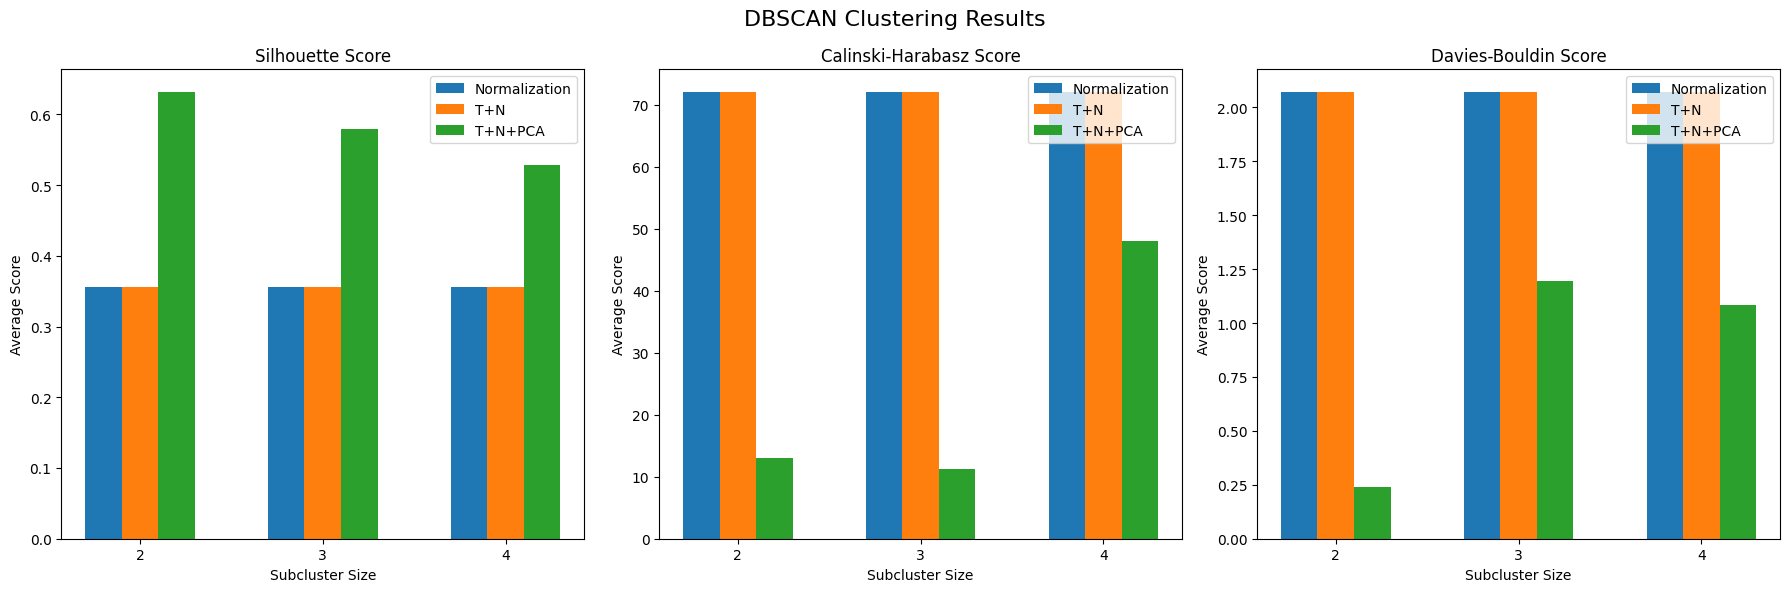

In [37]:
import numpy as np

# Define function to plot bar graphs for each clustering algorithm
def plot_bar_results_per_algorithm(algorithm_name, df):
    # Get unique processing methods and subcluster sizes
    processing_methods = df['Processing Method'].unique()
    subcluster_sizes = df['Subcluster Size'].unique()

    # Create subplots for each metric
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Plot bar graphs for each metric
    for i, metric in enumerate(['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']):
        ax = axs[i]
        bar_width = 0.2
        for j, method in enumerate(processing_methods):
            scores = []
            for size in subcluster_sizes:
                size_df = df[(df['Processing Method'] == method) & (df['Subcluster Size'] == size)]
                scores.append(size_df[metric].mean())
            ax.bar(np.arange(len(subcluster_sizes)) + j * bar_width, scores, bar_width, label=method)

        ax.set_title(metric)
        ax.set_xlabel('Subcluster Size')
        ax.set_ylabel('Average Score')
        ax.set_xticks(np.arange(len(subcluster_sizes)) + bar_width * (len(processing_methods) - 1) / 2)
        ax.set_xticklabels(subcluster_sizes)
        ax.legend()

    # Set title for the entire plot
    plt.suptitle(f'{algorithm_name} Clustering Results', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot bar results for each algorithm
for algorithm_name, df in dfs.items():
    plot_bar_results_per_algorithm(algorithm_name, df)
